# Project

The dataset I have chosen is chocolate bar ratings from 66 countries from 2006 to 2020. The source is https://www.kaggle.com/soroushghaderi/chocolate-bar-2020. It contains ratings of over 2200 individual chocolate bars, along with information on regional origin, percentage of cocoa, the variety of chocolate bean used, and where the beans were grown. The ratings are based on a scale of 1.0 to 5.0 where 1.0 is unpleasant and 5.0 is outstanding. 

Objective:

- Build a model to predict rating of chocolate bars based on relevant features.
- Compare three classifiers to find the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Reading the data and getting the column names
data = pd.read_csv(r"C:\Users\Kavya\Desktop\UCBoulder\dtsa-5509\Project\chocolate.csv")

data.columns

Index(['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

### Data Preparation and Cleaning

In [3]:
# Selecting columns that will be used for visualization and analysis
selected_columns = [
    'company',
    'company_location',
    'country_of_bean_origin', 
    'review_date',
    'rating',     
    'cocoa_percent',
    'counts_of_ingredients',
    'beans',
    'cocoa_butter',
    'vanilla',
    'lecithin',
    'salt',
    'sugar',
    'sweetener_without_sugar',
    'first_taste',
    'second_taste',
    'third_taste',
    'fourth_taste'
]

chocolate_df = data[selected_columns].copy()

# Cleaning a few columns to be represented as boolean values  
chocolate_df['beans'] = chocolate_df['beans'].replace(['have_bean','have_not_bean'],[0,1])
chocolate_df['cocoa_butter'] = chocolate_df['cocoa_butter'].replace(['have_cocoa_butter','have_not_cocoa_butter'],[0,1])
chocolate_df['vanilla'] = chocolate_df['vanilla'].replace(['have_vanila','have_not_vanila'],[0,1])
chocolate_df['lecithin'] = chocolate_df['lecithin'].replace(['have_lecithin','have_not_lecithin'],[0,1])
chocolate_df['salt'] = chocolate_df['salt'].replace(['have_salt','have_not_salt'],[0,1])
chocolate_df['sugar'] = chocolate_df['sugar'].replace(['have_sugar','have_not_sugar'],[0,1])
chocolate_df['sweetener_without_sugar'] = chocolate_df['sweetener_without_sugar'].replace(['have_sweetener_without_sugar','have_not_sweetener_without_sugar'],[0,1])

chocolate_df.head()

,company,company_location,country_of_bean_origin,review_date,rating,cocoa_percent,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,5150,U.S.A,Madagascar,2019,3.75,76.0,3,0,0,1,1,1,0,1,cocoa,blackberry,full body,NaN
1,5150,U.S.A,Dominican republic,2019,3.50,76.0,3,0,0,1,1,1,0,1,cocoa,vegetal,savory,NaN
2,5150,U.S.A,Tanzania,2019,3.25,76.0,3,0,0,1,1,1,0,1,rich cocoa,fatty,bready,NaN
3,A. Morin,France,Peru,2012,3.75,63.0,4,0,0,1,0,1,0,1,fruity,melon,roasty,NaN
4,A. Morin,France,Bolivia,2012,3.50,70.0,4,0,0,1,0,1,0,1,vegetal,nutty,NaN,NaN


In [4]:
# Finding NA values

chocolate_df.isnull().sum()


company                       0
company_location              0
country_of_bean_origin        0
review_date                   0
rating                        0
cocoa_percent                 0
counts_of_ingredients         0
beans                         0
cocoa_butter                  0
vanilla                       0
lecithin                      0
salt                          0
sugar                         0
sweetener_without_sugar       0
first_taste                   0
second_taste                 77
third_taste                 620
fourth_taste               1982
dtype: int64

In [5]:
# Since many of the NA values are in the third_taste and fourth_taste, we will drop the columns

chocolate_df = chocolate_df.drop(['second_taste','third_taste', 'fourth_taste', 'beans'], axis = 1)

chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  2224 non-null   object 
 1   company_location         2224 non-null   object 
 2   country_of_bean_origin   2224 non-null   object 
 3   review_date              2224 non-null   int64  
 4   rating                   2224 non-null   float64
 5   cocoa_percent            2224 non-null   float64
 6   counts_of_ingredients    2224 non-null   int64  
 7   cocoa_butter             2224 non-null   int64  
 8   vanilla                  2224 non-null   int64  
 9   lecithin                 2224 non-null   int64  
 10  salt                     2224 non-null   int64  
 11  sugar                    2224 non-null   int64  
 12  sweetener_without_sugar  2224 non-null   int64  
 13  first_taste              2224 non-null   object 
dtypes: float64(2), int64(8),

### Exploratory Data Analysis

<AxesSubplot:xlabel='rating', ylabel='cocoa_percent'>

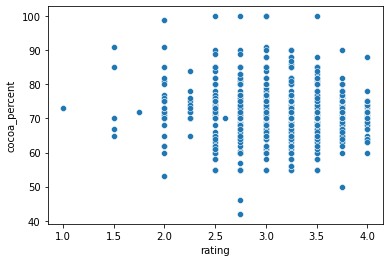

In [6]:
# Showing distribution of cocoa percentage in chocolate bars according to rating

sns.scatterplot(x="rating", y="cocoa_percent", data=chocolate_df)

<AxesSubplot:>

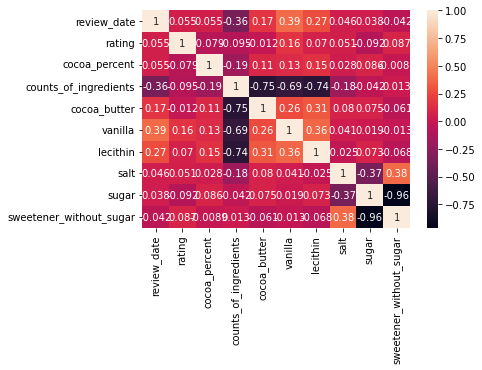

In [7]:
# Finding pairwise correlation in all columns an plotting them in heatmap

corr = chocolate_df.corr()

sns.heatmap(corr, annot = True)

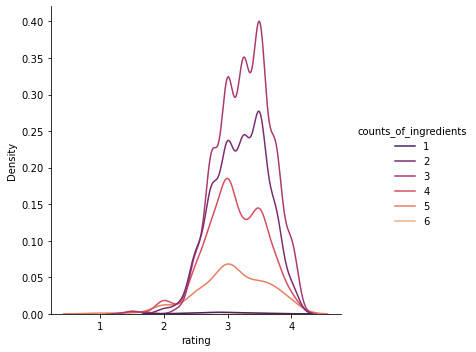

In [8]:
# Distribution of count of ingredients with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['counts_of_ingredients'] , palette = "flare_r", data=chocolate_df)

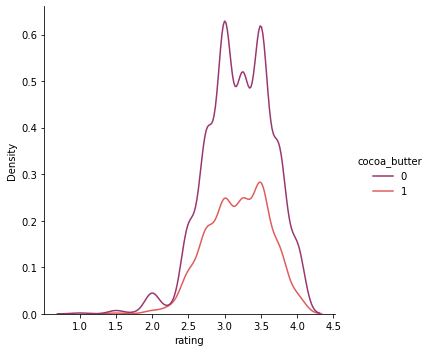

In [9]:
# Distribution of cocoa butter with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['cocoa_butter'] , palette = "flare_r", data=chocolate_df)

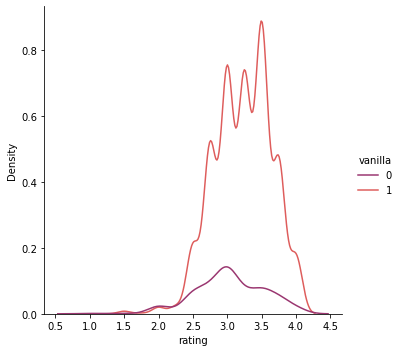

In [10]:
# Distribution of vanilla with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['vanilla'] , palette = "flare_r", data=chocolate_df)

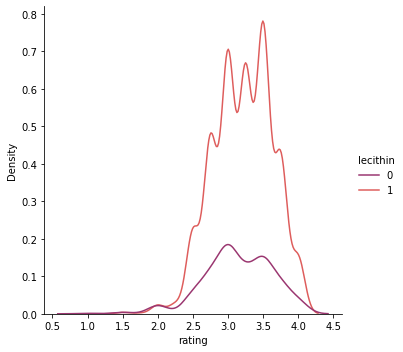

In [11]:
# Distribution of lecithin with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['lecithin'] , palette = "flare_r", data=chocolate_df)

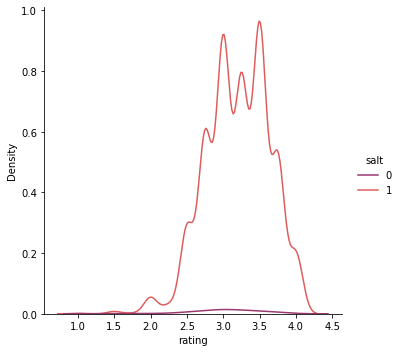

In [12]:
# Distribution of salt with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['salt'] , palette = "flare_r", data=chocolate_df)

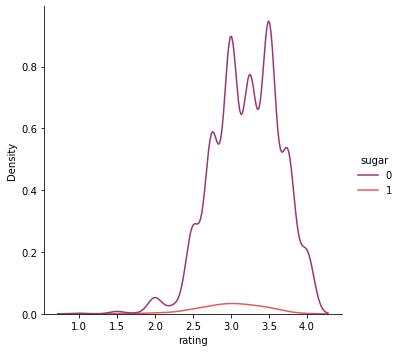

In [13]:
# Distribution of sugar with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['sugar'] , palette = "flare_r", data=chocolate_df)

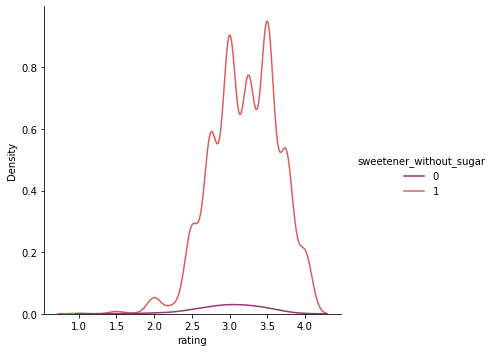

In [14]:
# Distribution of sweetener_without_sugar with respect to rating

sns.displot(x ='rating',kind = 'kde',
hue = chocolate_df['sweetener_without_sugar'] , palette = "flare_r", data=chocolate_df)

### Model

Using the data, I want to build a model that will predict ratings of chocolate bars based on the features provided. I will use three different classifiers and choose the model with higher accuracy.

In [15]:
# We will convert the categorical variables into dummy variables so that we can use it in our modelling.

company_name = pd.get_dummies(chocolate_df['company'],drop_first=True)
bean_origin = pd.get_dummies(chocolate_df['country_of_bean_origin'],drop_first=True)
companyLocation = pd.get_dummies(chocolate_df['company_location'],drop_first=True)
firstTaste = pd.get_dummies(chocolate_df['first_taste'],drop_first=True)

chocolate_df = pd.concat([chocolate_df, company_name, bean_origin, companyLocation, firstTaste], axis = 1)

chocolate_df.drop(['company', 'country_of_bean_origin','company_location', 'first_taste'], axis = 1, inplace = True )

chocolate_df = chocolate_df.loc[:,~chocolate_df.columns.duplicated()]

In [16]:
#Changing the 'rating' and 'cocoa_percent' column to integer values to avoid 'continuous' value error.

chocolate_df['rating'] = chocolate_df['rating'].astype(int)

chocolate_df['cocoa_percent'] = chocolate_df['cocoa_percent'].astype(int)

In [17]:
# Splitting dataset into training and testing subsets

X = chocolate_df.drop('rating', axis = 1)
y = chocolate_df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [18]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

# Building model using nearest neighbors classifier

knn = neighbors.KNeighborsClassifier(6)
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test,knn_predict)*100)

Accuracy: 71.01123595505618


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Building model using random forests

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test,clf_predict)*100)

Accuracy: 78.87640449438203


In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Building model using decision trees with adaboost ensemble methods

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm = "SAMME", n_estimators = 250
)

bdt.fit(X_train, y_train)

bdt_predict = bdt.predict(X_test)

print("Accuracy:", accuracy_score(y_test,bdt_predict)*100)

Accuracy: 69.88764044943821


### Result

 The accuracy scores of each classifier are:
 
 KNN Classifier: 71.01123595505618
 
 Random Forest Classifier: 78.87640449438203
 
 AdaBoost Classifier: 69.88764044943821

In [21]:
# Important features in Random Forest Classifier

clf_feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

clf_feature_scores.head(10)

cocoa_percent            0.062741
review_date              0.057169
counts_of_ingredients    0.019439
creamy                   0.012528
Venezuela                0.012444
U.S.A                    0.011438
Peru                     0.011228
Dominican republic       0.010505
Madagascar               0.010198
vanilla                  0.009491
dtype: float64

In [22]:
# Important features in AdaBoost Classifier

bdt_feature_scores = pd.Series(bdt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

bdt_feature_scores.head(10)

review_date          0.067833
cocoa_percent        0.062301
Blend                0.058805
Snake & Butterfly    0.058455
cocoa                0.052645
klingy               0.025979
dark berry           0.021872
creamy               0.019955
rich cocoa           0.017457
Soma                 0.016922
dtype: float64

### Conclusion

From the exploratory data analysis, we can see that there is negative correlation between counts_of_ingredients, cocoa_butter, vanilla and lecithin. Features like counts_of_ingredients, cocoa_percent, cocoa_butter, vanilla, lecithin will probably affect ratings of chocolate bars based on the distribution plots.

Comparing the three classifiers, the random forest classifier is more accurate in predicting ratings for the test variables. We can see that the best features for prediction in the adaboost classifier and random forest classifier model are cocoa_percent and review_date. 

To improve the accuracy of the model using random forest classifier, we can train the model using the best features. We can also collect more samples that can be used for training and testing.